# Introduction to Deep Learning
Deep Learning is a subfield of machine learning and artificial intelligence that is concerned with the development of algorithms that can learn to perform complex tasks by training on large sets of data. Deep learning models are designed to mimic the way that the human brain works by using interconnected layers of artificial neurons to process and interpret information.

The key advantage of deep learning over traditional machine learning algorithms is its ability to automatically learn hierarchical representations of data, which can capture complex patterns and relationships within the data. This makes deep learning particularly effective for tasks such as image and speech recognition, natural language processing, and decision making.

Deep learning models typically consist of multiple layers of artificial neurons, each of which performs a simple computation on its inputs and passes the result on to the next layer. The output of the final layer is used to make a prediction or decision based on the input data.

Training a deep learning model involves optimizing the parameters of the neural network to minimize the difference between the model's predictions and the actual output. This is typically done using a technique called backpropagation, which calculates the gradient of the loss function with respect to each parameter in the model and adjusts the parameters accordingly.

Recent advances in deep learning, particularly with the development of large-scale neural networks and the availability of massive datasets, have led to significant improvements in the accuracy and performance of many AI applications, and have contributed to the rapid growth of the AI industry.

In [19]:
from IPython.display import Image
Image(url='https://miro.medium.com/max/896/1*h_yloQIVEY2vaca31HN8HA.png')

# Building Block of Deep Learning
The building block of deep learning is the artificial neural network. An artificial neural network is a mathematical model that is designed to mimic the structure and function of the human brain. It is composed of interconnected layers of artificial neurons, each of which performs a simple computation on its inputs and passes the result on to the next layer.

The most common type of neural network used in deep learning is the feedforward neural network, which consists of an input layer, one or more hidden layers, and an output layer. The input layer takes in the raw input data, such as an image or a piece of text, and passes it on to the first hidden layer. Each hidden layer applies a series of mathematical transformations to the input data to produce a new representation, which is then passed on to the next layer. The final layer produces the output of the network, such as a classification label or a numerical value.

Another important building block of deep learning is the activation function. The activation function is a mathematical function that is applied to the output of each artificial neuron in a neural network. It introduces non-linearity into the network, which allows it to capture complex patterns and relationships within the data. Some common activation functions used in deep learning include the sigmoid function, the ReLU (Rectified Linear Unit) function, and the softmax function.

The optimization algorithm is also a crucial component of deep learning. Optimization algorithms are used to adjust the parameters of the neural network during the training process to minimize the difference between the model's predictions and the actual output. The most popular optimization algorithm used in deep learning is gradient descent, which iteratively adjusts the parameters of the network based on the gradient of the loss function with respect to each parameter.

Finally, deep learning also relies on large amounts of data for training. The more data a neural network is trained on, the better it becomes at generalizing to new, unseen data. Therefore, data preparation and preprocessing are critical steps in building effective deep learning models.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [2]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [3]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
train_images[0].ndim

2

In [5]:
train_images[0].shape

(28, 28)

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
train_labels[0]

5

In [9]:
#Network Architecture
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
#Compilation Step
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
#Preparing the image data
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32') / 255

In [12]:
#Preaparing the labels
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [13]:
#Training Step
network.fit(train_images, train_labels, epochs= 5, batch_size= 128)

Epoch 1/5
469/469 [==============================] - 6s 11ms/step - loss: 0.2556 - accuracy: 0.9265
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1044 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0676 - accuracy: 0.9802
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0489 - accuracy: 0.9855
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0378 - accuracy: 0.9887


In [14]:
#Testing Step
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0644 - accuracy: 0.9805
test_acc: 0.9804999828338623


In [15]:
network.predict(test_images)[0]

array([1.1525233e-08, 4.6937593e-11, 1.0075667e-06, 2.5818739e-04,
       8.1579153e-12, 6.5218103e-08, 6.8408571e-13, 9.9974018e-01,
       5.8743353e-08, 3.9273297e-07], dtype=float32)

In [16]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

<function matplotlib.pyplot.show(close=None, block=None)>

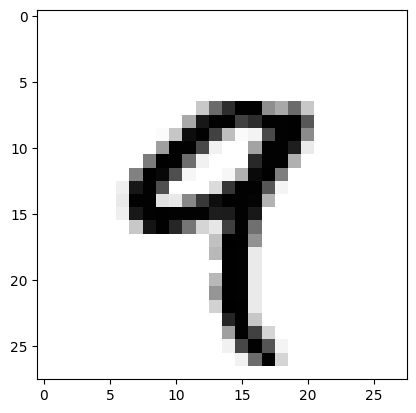

In [17]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = plt.cm.binary)
plt.show

In [18]:
train_labels[4]

9

# A look on Neural Network
A neural network is a type of machine learning algorithm that is modeled after the structure and function of the human brain. It is composed of interconnected layers of artificial neurons that work together to perform a specific task, such as image recognition or natural language processing.

The basic building block of a neural network is the artificial neuron, also known as a node. An artificial neuron receives one or more inputs, which are weighted and combined with a bias term to produce an output. The output of the neuron is then passed on to the next layer of neurons in the network.

Neural networks can have multiple layers of neurons, with each layer performing a different type of computation on the input data. The input layer receives the raw input data, such as an image or a piece of text, and passes it on to the first hidden layer. Each subsequent layer applies a series of mathematical transformations to the input data to produce a new representation, which is then passed on to the next layer.

The output layer of a neural network produces the final output of the model, such as a classification label or a numerical value. The output is computed based on the activation function of the final layer and the weighted sum of the outputs of the previous layer.

During training, the parameters of the neural network, such as the weights and biases, are adjusted using an optimization algorithm such as stochastic gradient descent. The goal of training is to minimize the difference between the output of the neural network and the actual output, as measured by a loss function.

Neural networks have been successfully applied to a wide range of applications, including computer vision, natural language processing, speech recognition, and recommendation systems. One of the advantages of neural networks is their ability to learn complex patterns and relationships within the data, which makes them highly effective for tasks that are difficult to solve using traditional machine learning algorithms.

In [23]:
# Helps to visualize the process...
from IPython.display import Image
Image(url='https://miro.medium.com/max/1280/1*e4q3pUGTsHOFYP9Us6hucQ.gif')

In [20]:
from IPython.display import Image
Image(url='https://uploads-ssl.webflow.com/5e406ebd483f3d05807695ac/5ef6264e9c8fd93380694488_5Id6AXaCeXDHL9XaW-j7StiEljSqIDbSFH2nSMBJ9eVZIjuePiG-Kgk3ioicpnxA-OLa09yFUsBr-EG1AVZ33CfEx1DFKoDGPD616yGnuT8j_xQ-KW66mXxmAuVPbIqKn4n9vxMF.png')

# Tensor Operations
Tensor operations are a fundamental component of many machine learning and deep learning algorithms. A tensor is a mathematical object that generalizes scalars, vectors, and matrices to higher dimensions. Tensors are used to represent and manipulate multi-dimensional data, such as images, videos, and text.

Tensor operations are mathematical operations that are performed on tensors. The most common tensor operations are:

1. **Element-wise Operations:** These operations are performed on individual elements of two or more tensors, such as addition, subtraction, multiplication, and division.
2. **Dot Product:** The dot product is a scalar value that results from multiplying two vectors together element-wise and summing the result. It is used for tasks like computing similarity between vectors or projecting one vector onto another.
3. **Matrix Multiplication:** Matrix multiplication is used extensively in deep learning for tasks such as weight updates in neural networks. It involves multiplying two matrices and summing the result along one dimension.
4. **Transpose:** The transpose of a tensor flips its dimensions, such that the rows become columns and vice versa. This is useful in various operations, such as computing the covariance matrix.
5. **Reduction Operations:** These operations reduce the dimensionality of a tensor along one or more dimensions, such as computing the mean, sum, maximum, or minimum of a tensor.
6. **Reshaping:** Reshaping involves changing the shape of a tensor while preserving its contents. This is useful for tasks such as flattening an image tensor into a vector for use in a neural network.
7. **Concatenation:** Concatenation is the process of combining two or more tensors along a specified dimension. This is useful for tasks such as combining the output of two neural network layers.
8. **Broadcasting:** Broadcasting is a technique used to perform element-wise operations between tensors of different shapes. The smaller tensor is "broadcasted" to match the shape of the larger tensor.
9. **Tensor Slicing:** Tensor slicing involves selecting a subset of a tensor along one or more dimensions. This is useful for tasks such as selecting a batch of data from a larger dataset.

Tensor operations are implemented using tensor libraries such as TensorFlow. This library provide efficient implementations of tensor operations that can be executed on CPUs or GPUs. The ability to perform tensor operations quickly and efficiently is critical for training and deploying deep learning models on large datasets.

In [21]:
from IPython.display import Image
Image(url='https://machinelearningknowledge.ai/wp-content/uploads/2021/04/operations.png')

In [41]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Addition
c = a + b

# Subtraction
d = a - b

# Multiplication
e = a * b

# Division
f = a / b

print("Addition:",c)
print("Subtraction:",d)
print("Multiplication:",e)
print("Division:",f)

Addition: [5 7 9]
Subtraction: [-3 -3 -3]
Multiplication: [ 4 10 18]
Division: [0.25 0.4  0.5 ]


In [42]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Dot Product
c = np.dot(a, b)
print("Dot Product:",c)

Dot Product: 32


In [53]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

# Matrix Multiplication
c = np.matmul(a, b)
print(c)

[[19 22]
 [43 50]]


In [44]:
a = np.array([[1, 2],
              [3, 4]])

# Transpose
b = np.transpose(a)
print(b)

[[1 3]
 [2 4]]


In [45]:
a = np.array([1, 2, 3])

# Sum
b = np.sum(a)

# Mean
c = np.mean(a)

# Maximum
d = np.max(a)

# Minimum
e = np.min(a)

print("Sum:",b)
print("Mean:",c)
print("Maximum:",d)
print("Minimum:",e)

Sum: 6
Mean: 2.0
Maximum: 3
Minimum: 1


In [52]:
a = np.array([[1, 2],
              [3, 4],
              [5, 6]])

# Reshape
b = np.reshape(a, (2, 3))
print(b)

[[1 2 3]
 [4 5 6]]


In [51]:
a = np.array([[1, 2],
              [3, 4]])

b = np.array([[5, 6],
              [7, 8]])

# Concatenate
c = np.concatenate((a, b), axis=1)
print(c)

[[1 2 5 6]
 [3 4 7 8]]


In [50]:
a = np.array([[1, 2],
              [3, 4]])

b = np.array([5, 6])

# Broadcasting
c = a + b
print(c)

[[ 6  8]
 [ 8 10]]


In [63]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])

# Tensor Slicing
b = a[:2, 1:]
print(b)

[[2 3]
 [5 6]]
